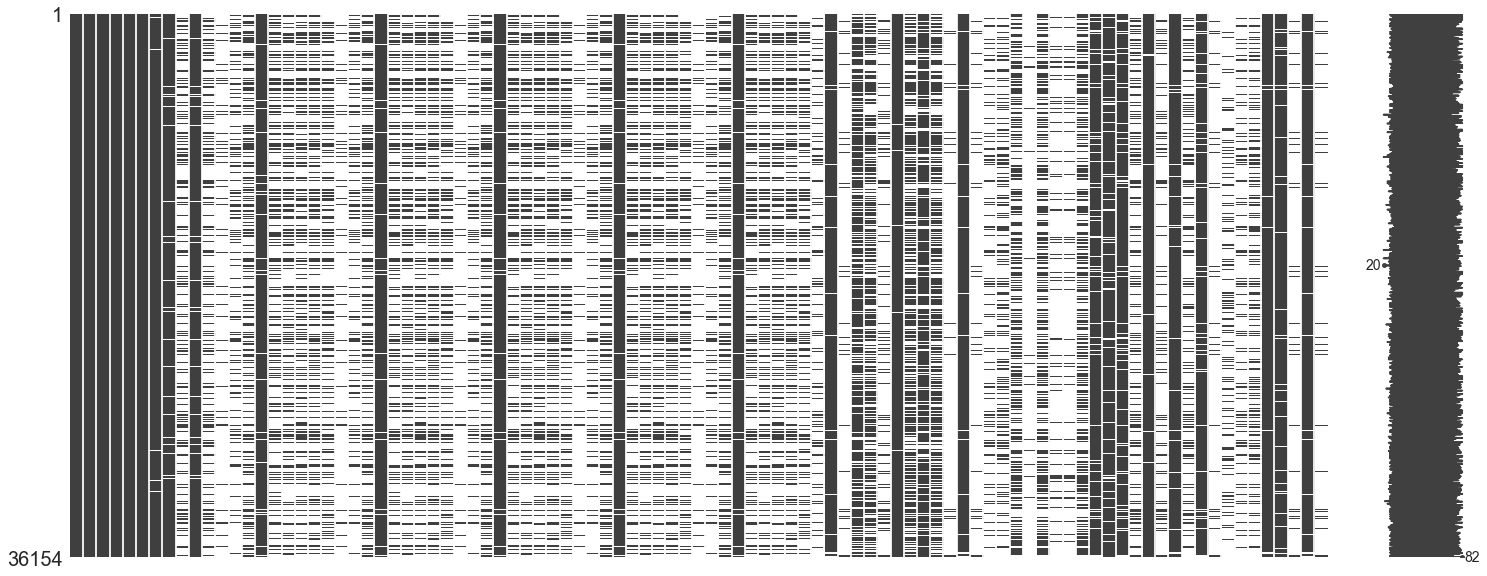

In [1]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'df5'
df = pd.read_csv(Location)


import missingno as msno

msno.matrix(df.sample(36154))

In [15]:
df.shape

(36154, 95)

In [16]:
df.head()

,Unnamed: 0,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,0,6,165,1,1,10,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,1,6,166,1,2,10,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,2,6,167,1,3,10,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,3,0,168,1,4,10,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,4,0,169,1,5,10,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


In [3]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).complete(df)

Imputing row 1/36154 with 53 missing, elapsed time: 1000.683
Imputing row 101/36154 with 13 missing, elapsed time: 1002.142
Imputing row 201/36154 with 33 missing, elapsed time: 1002.996
Imputing row 301/36154 with 61 missing, elapsed time: 1004.052
Imputing row 401/36154 with 61 missing, elapsed time: 1005.063
Imputing row 501/36154 with 61 missing, elapsed time: 1006.193
Imputing row 601/36154 with 18 missing, elapsed time: 1007.124
Imputing row 701/36154 with 54 missing, elapsed time: 1008.092
Imputing row 801/36154 with 35 missing, elapsed time: 1009.189
Imputing row 901/36154 with 62 missing, elapsed time: 1010.240
Imputing row 1001/36154 with 36 missing, elapsed time: 1011.390
Imputing row 1101/36154 with 56 missing, elapsed time: 1012.508
Imputing row 1201/36154 with 42 missing, elapsed time: 1013.661
Imputing row 1301/36154 with 73 missing, elapsed time: 1014.729
Imputing row 1401/36154 with 55 missing, elapsed time: 1015.763
Imputing row 1501/36154 with 27 missing, elapsed tim

In [13]:
df.columns

Index(['Unnamed: 0', 'dayofweek', 'normalized_time', 'chunkID',
       'position_within_chunk', 'month_most_common', 'Solar.radiation_64',
       'WindDirection..Resultant_1', 'WindDirection..Resultant_1018',
       'WindSpeed..Resultant_1', 'WindSpeed..Resultant_1018',
       'Ambient.Max.Temperature_14', 'Ambient.Max.Temperature_22',
       'Ambient.Max.Temperature_50', 'Ambient.Max.Temperature_52',
       'Ambient.Max.Temperature_57', 'Ambient.Max.Temperature_76',
       'Ambient.Max.Temperature_2001', 'Ambient.Max.Temperature_3301',
       'Ambient.Max.Temperature_6005', 'Ambient.Min.Temperature_14',
       'Ambient.Min.Temperature_22', 'Ambient.Min.Temperature_50',
       'Ambient.Min.Temperature_52', 'Ambient.Min.Temperature_57',
       'Ambient.Min.Temperature_76', 'Ambient.Min.Temperature_2001',
       'Ambient.Min.Temperature_3301', 'Ambient.Min.Temperature_6005',
       'Sample.Baro.Pressure_14', 'Sample.Baro.Pressure_22',
       'Sample.Baro.Pressure_50', 'Sample.Baro.Pressu

In [21]:
df1 = pd.DataFrame(data=X_filled_knn[0:,0:],    # values
             index=X_filled_knn[0:,0],    # 1st column as index
             columns=df.columns)  # 1st row as the column names


In [22]:
df1 = df1.drop(df.columns[[0]], axis=1)
df1.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,WindSpeed..Resultant_1018,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0.0,6.0,165.0,1.0,1.0,10.0,0.01,117.0,187.0,0.3,0.3,...,1.748424,0.950895,0.600515,5.130631,1.341606,2.138792,3.013752,0.648110,5.679280,0.925137
1.0,6.0,166.0,1.0,2.0,10.0,0.01,231.0,202.0,0.5,0.6,...,2.144120,0.950897,0.378336,5.130631,1.195779,2.722099,3.888712,0.648115,7.426751,0.925135
2.0,6.0,167.0,1.0,3.0,10.0,0.01,247.0,227.0,0.5,1.5,...,1.932469,0.950898,0.378066,5.136395,1.409658,3.110970,3.888712,0.648115,7.683732,0.925135
3.0,0.0,168.0,1.0,4.0,10.0,0.01,219.0,218.0,0.2,1.2,...,2.088907,0.950897,0.378563,5.217102,1.477711,2.041574,3.208188,0.648114,4.831243,0.925135
4.0,0.0,169.0,1.0,5.0,10.0,0.01,2.0,216.0,0.2,0.3,...,2.604232,0.920222,0.540160,5.217102,1.458267,2.138792,3.499841,0.680505,4.625658,0.985088


In [23]:
print(df1.isnull().sum()) ###Total count of NaN

dayofweek                        0
normalized_time                  0
chunkID                          0
position_within_chunk            0
month_most_common                0
Solar.radiation_64               0
WindDirection..Resultant_1       0
WindDirection..Resultant_1018    0
WindSpeed..Resultant_1           0
WindSpeed..Resultant_1018        0
Ambient.Max.Temperature_14       0
Ambient.Max.Temperature_22       0
Ambient.Max.Temperature_50       0
Ambient.Max.Temperature_52       0
Ambient.Max.Temperature_57       0
Ambient.Max.Temperature_76       0
Ambient.Max.Temperature_2001     0
Ambient.Max.Temperature_3301     0
Ambient.Max.Temperature_6005     0
Ambient.Min.Temperature_14       0
Ambient.Min.Temperature_22       0
Ambient.Min.Temperature_50       0
Ambient.Min.Temperature_52       0
Ambient.Min.Temperature_57       0
Ambient.Min.Temperature_76       0
Ambient.Min.Temperature_2001     0
Ambient.Min.Temperature_3301     0
Ambient.Min.Temperature_6005     0
Sample.Baro.Pressure

In [33]:
df1.columns[93]

'target_9_8003'

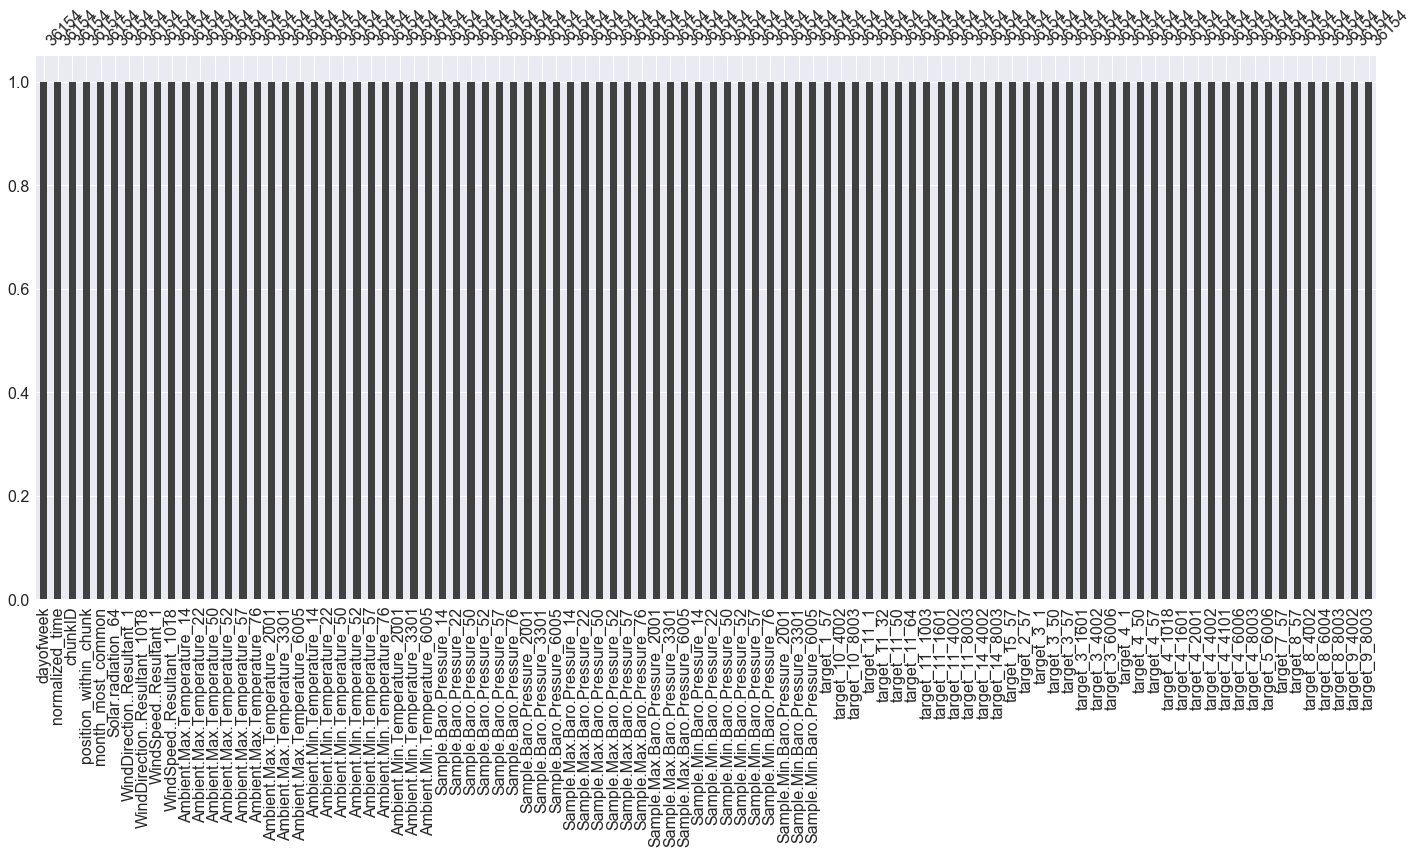

In [25]:
msno.bar(df1.sample(36154))

In [36]:
df_input = df1.drop(df1.columns[55:94], axis=1)
df_input.head()

,dayofweek,normalized_time,chunkID,position_within_chunk,month_most_common,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,WindSpeed..Resultant_1018,...,Sample.Max.Baro.Pressure_6005,Sample.Min.Baro.Pressure_14,Sample.Min.Baro.Pressure_22,Sample.Min.Baro.Pressure_50,Sample.Min.Baro.Pressure_52,Sample.Min.Baro.Pressure_57,Sample.Min.Baro.Pressure_76,Sample.Min.Baro.Pressure_2001,Sample.Min.Baro.Pressure_3301,Sample.Min.Baro.Pressure_6005
0.0,6.0,165.0,1.0,1.0,10.0,0.01,117.0,187.0,0.3,0.3,...,766.000028,749.000028,741.000027,741.000027,743.0,745.000027,746.000028,753.000028,745.000027,759.000028
1.0,6.0,166.0,1.0,2.0,10.0,0.01,231.0,202.0,0.5,0.6,...,765.999981,748.999982,740.999982,740.999982,743.0,744.999982,745.999982,752.999982,744.999982,758.999982
2.0,6.0,167.0,1.0,3.0,10.0,0.01,247.0,227.0,0.5,1.5,...,766.000026,749.000026,741.000026,741.000026,743.0,745.000026,746.000026,753.000026,745.000026,759.000026
3.0,0.0,168.0,1.0,4.0,10.0,0.01,219.0,218.0,0.2,1.2,...,766.000000,749.000000,741.000000,741.000000,748.0,745.000000,746.000000,753.000000,745.000000,759.000000
4.0,0.0,169.0,1.0,5.0,10.0,0.01,2.0,216.0,0.2,0.3,...,765.999969,748.999969,740.999970,740.999970,748.0,744.999969,745.999969,752.999969,744.999969,758.999969


In [39]:
df_targets = df1.drop(df1.columns[0:55], axis=1)
df_targets.head()

,target_1_57,target_10_4002,target_10_8003,target_11_1,target_11_32,target_11_50,target_11_64,target_11_1003,target_11_1601,target_11_4002,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0.0,2.679233,6.181623,0.467350,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,...,1.748424,0.950895,0.600515,5.130631,1.341606,2.138792,3.013752,0.648110,5.679280,0.925137
1.0,2.679233,8.475833,0.467344,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,...,2.144120,0.950897,0.378336,5.130631,1.195779,2.722099,3.888712,0.648115,7.426751,0.925135
2.0,2.679233,8.921930,0.467344,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,...,1.932469,0.950898,0.378066,5.136395,1.409658,3.110970,3.888712,0.648115,7.683732,0.925135
3.0,2.679233,5.098246,0.467345,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,...,2.088907,0.950897,0.378563,5.217102,1.477711,2.041574,3.208188,0.648114,4.831243,0.925135
4.0,2.679233,4.875197,0.467354,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,0.114975,...,2.604232,0.920222,0.540160,5.217102,1.458267,2.138792,3.499841,0.680505,4.625658,0.985088


#Estimate Coefficients, intercept, and mse for multiple linear regression for each targets

In [40]:
from sklearn.linear_model import LinearRegression
X = df_input

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
df_coeff = pd.DataFrame(['dayofweek', 'normalized_time', 'chunkID', 'position_within_chunk',
       'month_most_common', 'Solar.radiation_64', 'WindDirection..Resultant_1',
       'WindSpeed..Resultant_1', 'Ambient.Max.Temperature_52',
       'Ambient.Min.Temperature_52', 'Sample.Baro.Pressure_52',
       'Sample.Max.Baro.Pressure_52', 'Sample.Min.Baro.Pressure_52','intercept','mean standard error'], columns = ['features'])

for x in range(len(df_targets.columns)):
    lm.fit(X, df_targets[df_targets.columns[x]])
    mse = np.mean((df_targets[df_targets.columns[x]] - lm.predict(X)) ** 2)
    dat = pd.DataFrame(list(zip(lm.coef_)), columns = [df_targets.columns[x]])
    dat.loc[13] = lm.intercept_
    dat.loc[14] = mse
    df_coeff = df_coeff.join(dat)
print("Estimated Coeffiencts")
df_coeff

Estimated Coeffiencts


,features,target_1_57,target_10_4002,target_10_8003,target_11_1,target_11_32,target_11_50,target_11_64,target_11_1003,target_11_1601,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,dayofweek,0.020511,0.016921,0.006145,-0.014463,-0.017578,0.002752,-0.013831,-0.013537,-0.012942,...,0.013068,0.002676,-0.009568,0.019174,-0.008944,-0.000942,0.006867,0.000004,0.021517,0.004833
1,normalized_time,0.000501,-0.000052,-0.000182,0.000085,0.000055,-0.000149,-0.000041,0.000516,0.000049,...,0.001447,-0.000245,-0.000585,0.000323,0.001311,-0.000116,0.000123,0.000010,-0.000200,-0.000383
2,chunkID,-0.000907,0.000004,0.000640,0.001271,0.000923,0.000341,0.000265,0.000667,0.000024,...,-0.000527,-0.000208,-0.001119,-0.001392,-0.000603,0.000116,0.000049,0.001658,0.000032,0.000283
3,position_within_chunk,0.000255,-0.000024,0.000226,-0.000043,0.000428,0.000194,0.000103,-0.000252,0.000004,...,-0.001990,0.000205,0.000326,0.000215,-0.001192,0.000049,-0.000132,0.000014,0.000067,0.000371
4,month_most_common,0.003837,0.022475,0.007400,-0.025652,-0.044304,-0.016020,-0.046218,-0.040134,-0.039288,...,-0.033300,-0.002378,0.009051,0.010037,0.028628,0.000819,0.005141,0.004383,0.015174,0.004943
5,Solar.radiation_64,-0.047460,-0.037207,0.034028,0.968373,0.549173,0.087576,0.628881,0.885185,0.874161,...,-0.217235,0.029671,0.045931,-0.008213,-0.101810,-0.047982,-0.128863,0.017625,-0.292261,0.029720
6,WindDirection..Resultant_1,-0.000333,-0.000029,0.000855,-0.000935,-0.001281,-0.000660,-0.001497,-0.000717,-0.000479,...,-0.000611,-0.000393,0.000428,-0.000247,-0.000195,0.000059,-0.000130,0.000001,-0.000170,0.000757
7,WindSpeed..Resultant_1,0.000895,0.000214,-0.000151,0.000137,-0.000540,0.000175,-0.000500,-0.000057,-0.000150,...,0.000421,0.000178,-0.000185,0.001099,0.001075,-0.000006,0.000113,-0.000024,0.000215,0.000024
8,Ambient.Max.Temperature_52,0.005749,-0.088330,-0.008967,0.098099,0.040965,0.015375,0.076989,0.054508,0.086313,...,-0.022943,-0.002951,0.009938,0.007866,0.014176,-0.018727,-0.023374,-0.003920,-0.114499,-0.008946
9,Ambient.Min.Temperature_52,-0.066847,-0.021961,-0.022306,0.011146,-0.007179,0.070756,0.002105,0.005953,-0.009581,...,-0.014450,-0.003581,0.005598,-0.088920,-0.074826,-0.002342,-0.004684,-0.007074,-0.024847,-0.026221


#Split dataframe to test and training set.

In [43]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, df_targets, test_size=0.2, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(28923, 55)
(7231, 55)
(28923, 39)
(7231, 39)


/Users/jtlam/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
df_coeff_split = pd.DataFrame(['Training MSE', 'Testing MSE'], columns = ['Mean Standard Error'])

for x in range(len(df_targets.columns)):
    lm.fit(X_train, Y_train[Y_train.columns[x]])
    pred_train = lm.predict(X_train)
    pred_test = lm.predict(X_test)
    mse_train = np.mean((Y_train[Y_train.columns[x]] - lm.predict(X_train)) ** 2)
    mse_test = np.mean((Y_test[Y_test.columns[x]] - lm.predict(X_test)) ** 2)
    col = pd.DataFrame([mse_train, mse_test], columns = [df_targets.columns[x]])

    
    df_coeff_split = df_coeff_split.join(col)
print("MSE_Split")
df_coeff_split

MSE_Split


,Mean Standard Error,target_1_57,target_10_4002,target_10_8003,target_11_1,target_11_32,target_11_50,target_11_64,target_11_1003,target_11_1601,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,Training MSE,0.539619,0.620117,0.358903,0.668449,0.829788,0.885534,0.501481,0.778480,0.567134,...,0.975101,0.114337,0.763268,0.633562,3.465359,0.064496,0.191318,0.041177,0.611097,0.459809
1,Testing MSE,0.525505,0.658437,0.378961,0.690369,0.833202,0.904827,0.490655,0.773757,0.558189,...,1.012393,0.106017,0.770405,0.648414,3.340278,0.064747,0.204483,0.042371,0.644451,0.471628


# K Fold Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression()
df_kfold = pd.DataFrame(['Folds', 'MSE','STD'], columns = ['KFolds Score'])

for x in range(len(df_targets.columns)):
    
    scores = cross_val_score(lm, X, df_targets[df_targets.columns[x]], scoring='neg_mean_squared_error', cv=4)
    kfold_mse = np.mean(np.abs(scores))
    kfold_std = np.std(scores)
    col2 = pd.DataFrame([len(scores),kfold_mse ,kfold_std ], columns = [df_targets.columns[x]])
    df_kfold = df_kfold.join(col2)
print("KFold Score")
df_kfold

KFold Score


,KFolds Score,target_1_57,target_10_4002,target_10_8003,target_11_1,target_11_32,target_11_50,target_11_64,target_11_1003,target_11_1601,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,Folds,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1,MSE,0.756650,0.665082,0.669645,0.743334,0.958074,1.281051,0.537480,0.869804,0.620404,...,1.080758,0.141009,0.965262,0.956791,4.844008,0.075254,0.222604,0.097408,0.659712,1.059636
2,STD,0.382437,0.125252,0.272360,0.034726,0.101013,0.556043,0.018815,0.079738,0.010290,...,0.089880,0.064853,0.188956,0.359436,1.546208,0.010963,0.012312,0.043504,0.100417,0.435314


# K Fold Cross Validation with ShuffleSplit

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
lm = LinearRegression()
df_kfold = pd.DataFrame(['Folds', 'MSE','STD'], columns = ['KFolds Score'])

for x in range(len(df_targets.columns)):
    cv = ShuffleSplit(n_splits=4, test_size=0.20, random_state=10)
    scores = cross_val_score(lm, X, df_targets[df_targets.columns[x]], scoring='neg_mean_squared_error', cv=cv)
    kfold_mse = np.mean(np.abs(scores))
    kfold_std = np.std(scores)
    col2 = pd.DataFrame([len(scores),kfold_mse ,kfold_std ], columns = [df_targets.columns[x]])
    df_kfold = df_kfold.join(col2)
print("KFold Score ShuffleSplit")
df_kfold

KFold Score ShuffleSplit


,KFolds Score,target_1_57,target_10_4002,target_10_8003,target_11_1,target_11_32,target_11_50,target_11_64,target_11_1003,target_11_1601,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,Folds,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1,MSE,0.537610,0.599057,0.367775,0.678424,0.829353,0.890678,0.503576,0.779776,0.572876,...,0.971095,0.113537,0.766406,0.629567,3.490941,0.064069,0.192439,0.041516,0.593998,0.466841
2,STD,0.012308,0.031977,0.002798,0.002723,0.007057,0.013911,0.006388,0.005013,0.008126,...,0.017193,0.008500,0.008572,0.015680,0.040112,0.002955,0.002569,0.001040,0.027008,0.006716
